In [1]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()



Saving ToothNumber_TaskDataset.zip to ToothNumber_TaskDataset.zip


In [2]:
# Unzip the dataset if it's in a zip file
with zipfile.ZipFile('ToothNumber_TaskDataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Check the extracted files
os.listdir('dataset')

['images', 'labels']

# Exploring Dataset---
Picking N random images-> Find their matching .txt label ->Draw bounding boxes-> Display them with class ids.

Showing: cate2-00010_jpg.rf.840b78b87aefc5c054c0a14ce7343e65.jpg


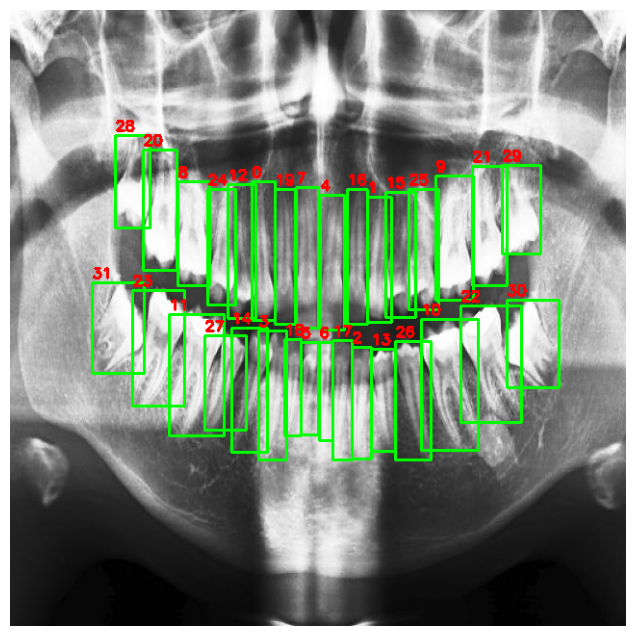

Showing: cate2-00118_jpg.rf.22cdc88bee09962310d19ce17c820d77.jpg


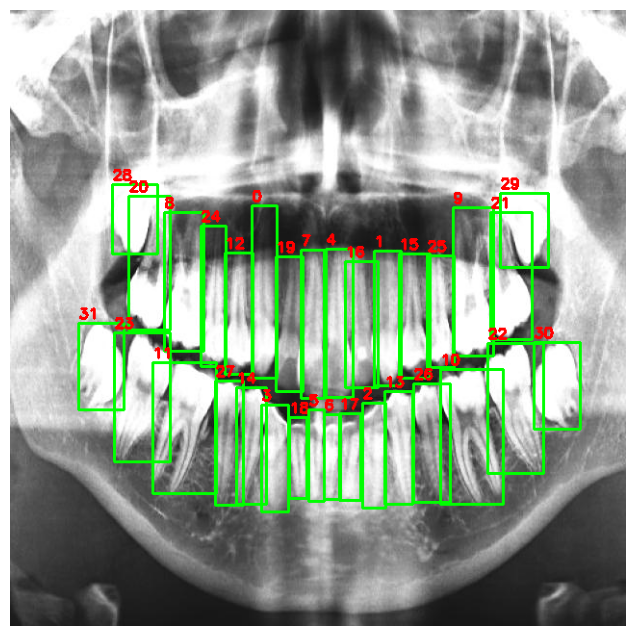

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def visualize_labels(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue  # skip invalid lines

        class_id, x_center, y_center, box_w, box_h = map(float, parts)

        # Convert YOLO → pixel coords
        x_center *= w
        y_center *= h
        box_w *= w
        box_h *= h

        x1 = int(x_center - box_w / 2)
        y1 = int(y_center - box_h / 2)
        x2 = int(x_center + box_w / 2)
        y2 = int(y_center + box_h / 2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(int(class_id)), (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


# ----- Show random N images -----
images_dir = "dataset/images"
labels_dir = "dataset/labels"

all_images = os.listdir(images_dir)
N = 2  # number of random images to preview

for img_file in random.sample(all_images, N):
    stem = os.path.splitext(img_file)[0]
    image_path = os.path.join(images_dir, img_file)
    label_path = os.path.join(labels_dir, stem + ".txt")

    if os.path.exists(label_path):
        print(f"Showing: {img_file}")
        visualize_labels(image_path, label_path)


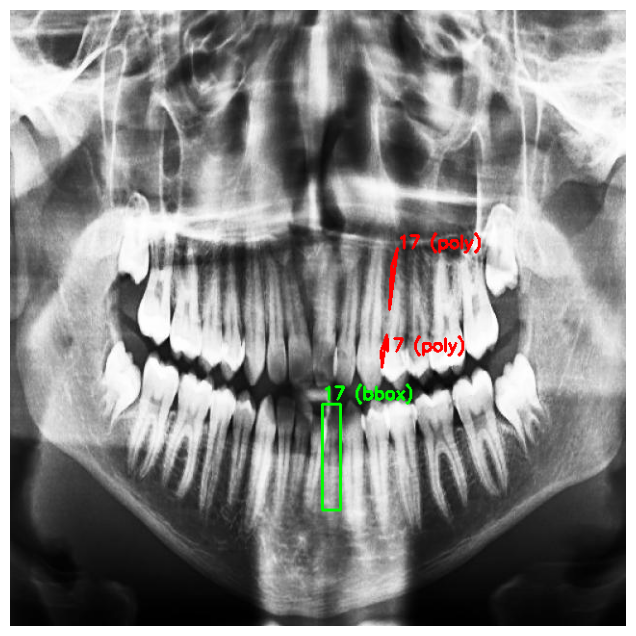

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_class17_annotations(image_path, label_lines):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    for line in label_lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        values = list(map(float, parts[1:]))

        # Case 1: valid YOLO bbox (5 columns)
        if len(parts) == 5:
            x_center, y_center, bw, bh = values
            x_center, y_center, bw, bh = (
                x_center * w, y_center * h, bw * w, bh * h
            )
            x1, y1 = int(x_center - bw / 2), int(y_center - bh / 2)
            x2, y2 = int(x_center + bw / 2), int(y_center + bh / 2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bbox
            cv2.putText(img, "17 (bbox)", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Case 2: polygon (more than 5 columns)
        elif len(parts) > 5:
            coords = values
            polygon = []
            for i in range(0, len(coords), 2):
                x = int(coords[i] * w)
                y = int(coords[i+1] * h)
                polygon.append((x, y))
            if polygon[0] == polygon[-1]:  # remove duplicate last point
                polygon = polygon[:-1]
            polygon = np.array(polygon, dtype=np.int32)

            cv2.polylines(img, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)  # Blue polygon
            cv2.putText(img, "17 (poly)", tuple(polygon[0]),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


# Example usage with your 3 rows
image_path = "dataset/images/cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1.jpg"
class17_lines = [
    "17 0.521875 0.725 0.0296875 0.171875",
    "17 0.6292968390625 0.3871093765625 0.619706440625 0.415796178125 0.616365096875 0.485995715625 0.6292968390625 0.3871093765625",
    "17 0.60252181875 0.5533360921875 0.6040840359375 0.5799064375 0.6110424671875 0.5266967593749999 0.60252181875 0.5533360921875"
]

plot_class17_annotations(image_path, class17_lines)


🖼️ Showing: cate2-00029_jpg.rf.18be40d73e21136c043b185eece71e07.jpg
⚠️ Skipping invalid line 2 in dataset/labels/cate2-00029_jpg.rf.18be40d73e21136c043b185eece71e07.txt


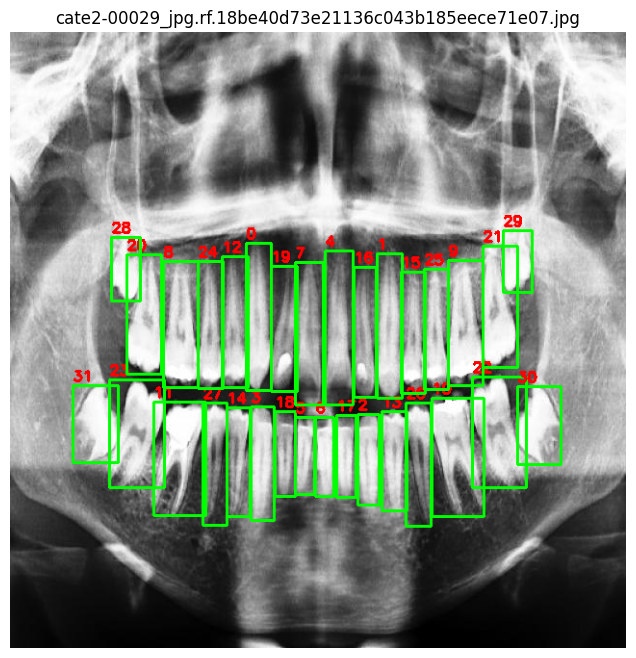

🖼️ Showing: cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1.jpg
⚠️ Skipping invalid line 31 in dataset/labels/cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1.txt
⚠️ Skipping invalid line 32 in dataset/labels/cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1.txt


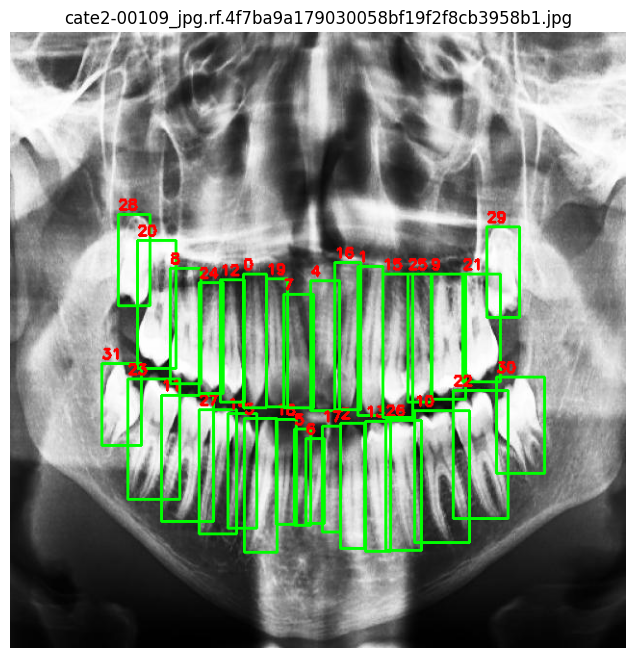

🖼️ Showing: cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.jpg
⚠️ Skipping invalid line 1 in dataset/labels/cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.txt


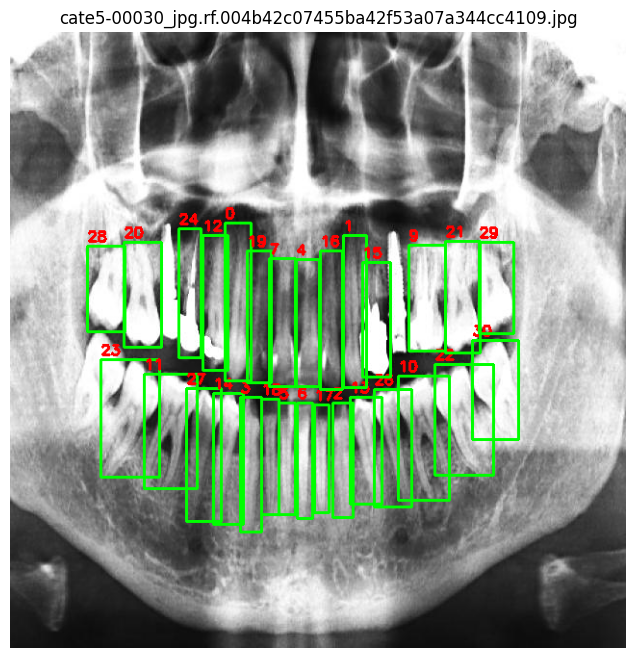

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def visualize_labels(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Image not found or unreadable: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    for idx, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) != 5:
            print(f"⚠️ Skipping invalid line {idx+1} in {label_path}")
            continue

        try:
            class_id, x_center, y_center, box_w, box_h = map(float, parts)
        except ValueError:
            print(f"⚠️ Non-numeric values in line {idx+1} of {label_path}")
            continue

        # Convert YOLO → pixel coords
        x_center *= w
        y_center *= h
        box_w *= w
        box_h *= h

        x1 = int(x_center - box_w / 2)
        y1 = int(y_center - box_h / 2)
        x2 = int(x_center + box_w / 2)
        y2 = int(y_center + box_h / 2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(int(class_id)), (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(image_path))
    plt.show()

# ----- Load report and visualize -----
images_dir = "dataset/images"
labels_dir = "dataset/labels"
report_path = os.path.join(labels_dir, "_label_validation_report.csv")

df = pd.read_csv(report_path)

# If your CSV has a column like 'image_stem', use that:
if "image_stem" in df.columns:
    stems = df["image_stem"].unique()
else:
    print("⚠️ Column 'image_stem' not found in report.")
    stems = []

for stem in stems:
    # Adjust filename logic if needed
    image_file = stem + ".jpg"  # or use stem.replace("_", ".") if needed
    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, stem + ".txt")

    if os.path.exists(image_path) and os.path.exists(label_path):
        print(f"🖼️ Showing: {image_file}")
        visualize_labels(image_path, label_path)
    else:
        print(f"🚫 Missing file for: {stem}")


Found 3 files with errors
Showing errors for: cate2-00029_jpg.rf.18be40d73e21136c043b185eece71e07.txt


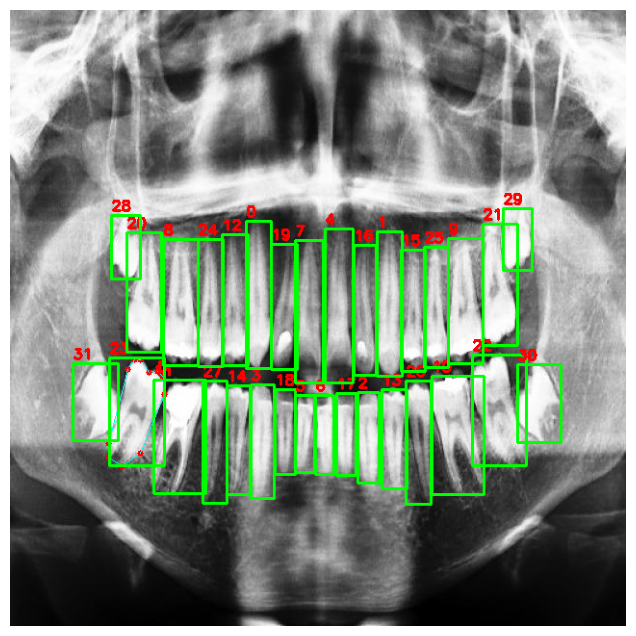

Showing errors for: cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1.txt


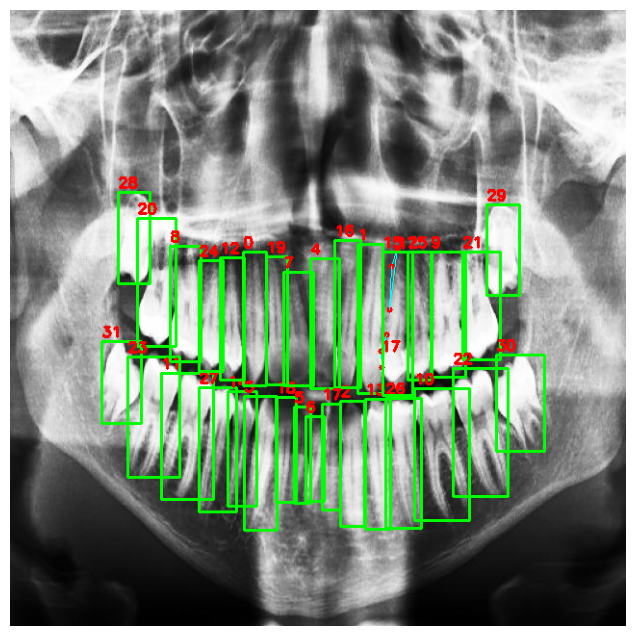

Showing errors for: cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.txt


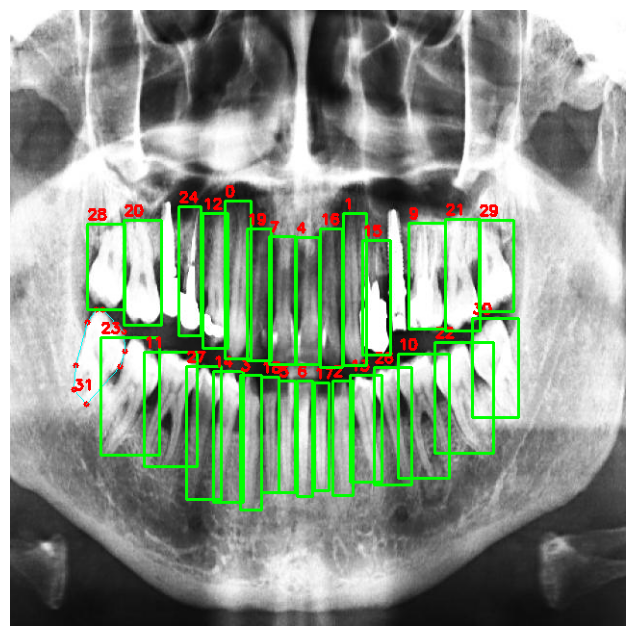

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# ---- CONFIG ----
images_dir = "dataset/images"
labels_dir = "dataset/labels"
report_path = os.path.join(labels_dir, "_label_validation_report.csv")

# ---- FUNCTIONS ----
def visualize_labels(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Could not open image: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])

        if len(parts) == 5:
            # Standard YOLO bounding box
            _, x_center, y_center, box_w, box_h = map(float, parts)
            x_center *= w
            y_center *= h
            box_w *= w
            box_h *= h

            x1 = int(x_center - box_w / 2)
            y1 = int(y_center - box_h / 2)
            x2 = int(x_center + box_w / 2)
            y2 = int(y_center + box_h / 2)

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, str(class_id), (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        elif len(parts) > 5:
            # Polygon-like annotation
            coords = list(map(float, parts[1:]))
            points = [(int(coords[i] * w), int(coords[i+1] * h))
                      for i in range(0, len(coords), 2)]

            for i in range(len(points)):
                cv2.circle(img, points[i], 3, (255, 0, 0), -1)
                cv2.line(img, points[i], points[(i+1) % len(points)], (0, 255, 255), 1)

            cv2.putText(img, str(class_id), points[0],
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


# ---- MAIN ----
# Read the validation report
report_df = pd.read_csv(report_path)

# Collect unique image stems with issues
error_files = report_df["image_stem"].unique().tolist()

print(f"Found {len(error_files)} files with errors")

for stem in error_files:
    txt_file = stem + ".txt"
    label_path = os.path.join(labels_dir, txt_file)

    # Try both jpg/png images
    image_path_jpg = os.path.join(images_dir, stem + ".jpg")
    image_path_png = os.path.join(images_dir, stem + ".png")
    image_path = image_path_jpg if os.path.exists(image_path_jpg) else image_path_png

    if os.path.exists(image_path) and os.path.exists(label_path):
        print(f"Showing errors for: {txt_file}")
        visualize_labels(image_path, label_path)
    else:
        print(f"⚠️ Missing file for: {txt_file}")


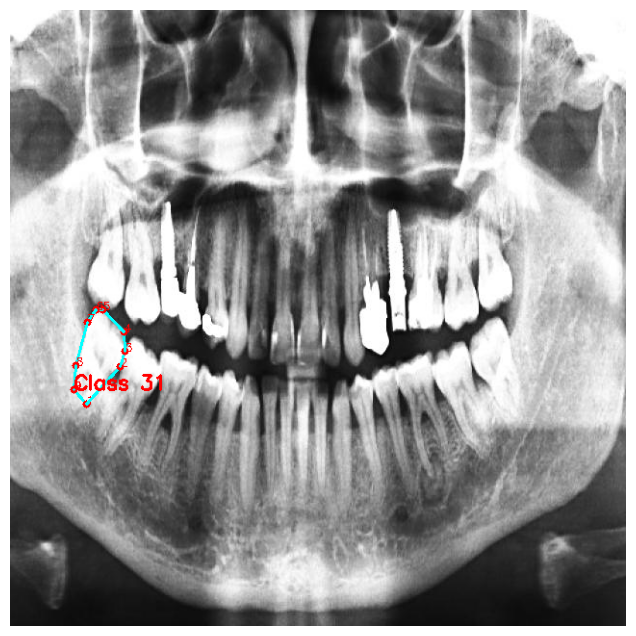

In [7]:
import cv2
import matplotlib.pyplot as plt

# ---- CONFIG ----
stem = "cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109"
image_path = f"dataset/images/{stem}.jpg"
label_path = f"dataset/labels/{stem}.txt"

# ---- LOAD IMAGE ----
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# ---- READ LABEL ----
with open(label_path, "r") as f:
    lines = f.readlines()

# Only take the line with class 31
for line in lines:
    if line.startswith("31 "):  # class 31
        parts = line.strip().split()
        coords = list(map(float, parts[1:]))
        points = [(int(coords[i] * w), int(coords[i+1] * h)) for i in range(0, len(coords), 2)]

        # Draw polygon
        for i, pt in enumerate(points):
            cv2.circle(img, pt, 4, (255, 0, 0), -1)  # blue dots
            cv2.putText(img, str(i), pt, cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
            cv2.line(img, pt, points[(i+1) % len(points)], (0, 255, 255), 2)

        # Label class id
        cv2.putText(img, "Class 31", points[0], cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# ---- SHOW ----
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


In [8]:
import os

# --- CONFIG ---
labels_dir = "dataset/labels"
stem = "cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109"  # change if needed
label_path = os.path.join(labels_dir, stem + ".txt")

# --- READ & PRINT ---
if os.path.exists(label_path):
    print(f"\nContents of {label_path}:\n" + "-"*50)
    with open(label_path, "r") as f:
        for i, line in enumerate(f, start=1):
            print(f"Line {i}: {line.strip()}")
else:
    print(f"❌ Label file not found: {label_path}")



Contents of dataset/labels/cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.txt:
--------------------------------------------------
Line 1: 31 0.1043478265625 0.6163043484374999 0.12391304375000001 0.6402173906249999 0.17826087031249999 0.5793478265625 0.186956521875 0.5532608703124999 0.184782609375 0.5228260875 0.15108695625 0.486956521875 0.140217390625 0.486956521875 0.12608695625 0.5076086953125001 0.1065217390625 0.5771739124999999 0.1043478265625 0.6163043484374999
Line 2: 23 0.1953125 0.62734375 0.0953125 0.18984375
Line 3: 11 0.2609375 0.64765625 0.08671875 0.1859375
Line 4: 27 0.31484375 0.68671875 0.05625 0.21640625
Line 5: 14 0.3546875 0.69296875 0.04765625 0.21171875
Line 6: 3 0.39140625 0.70234375 0.03515625 0.21875
Line 7: 18 0.42265625 0.68984375 0.028125 0.18828125
Line 8: 5 0.45 0.69296875 0.02578125 0.18125
Line 9: 6 0.47890625 0.69609375 0.025 0.18828125
Line 10: 17 0.50625 0.6921875 0.02265625 0.175
Line 11: 2 0.53984375 0.6953125 0.0328125 0.1859375
Line 12: 1


Showing errors for: cate2-00029_jpg.rf.18be40d73e21136c043b185eece71e07


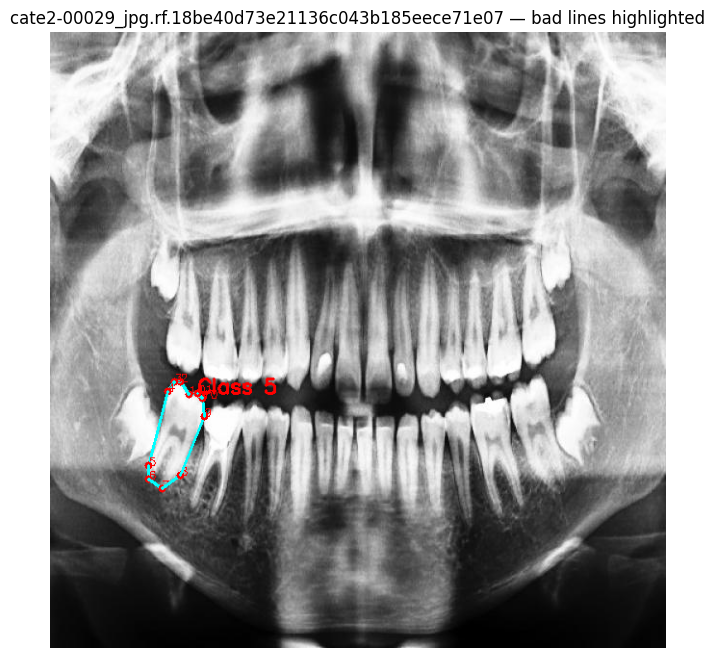


Showing errors for: cate2-00109_jpg.rf.4f7ba9a179030058bf19f2f8cb3958b1


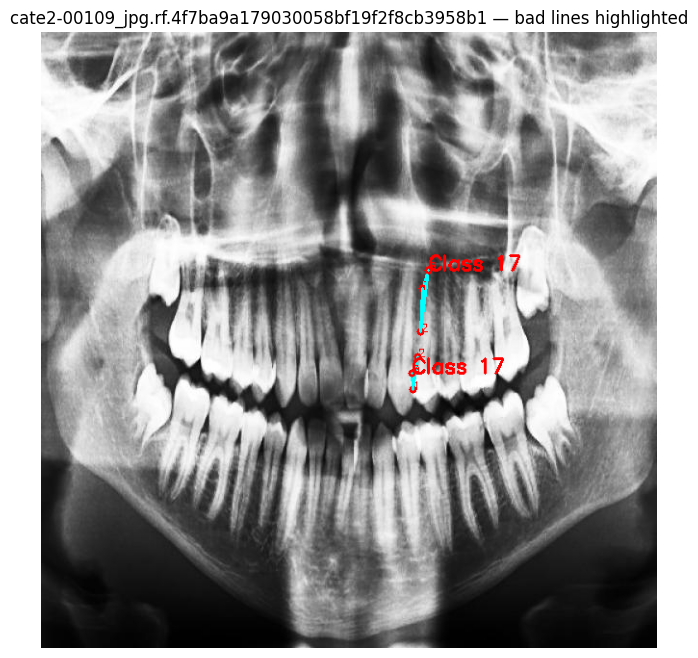


Showing errors for: cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109


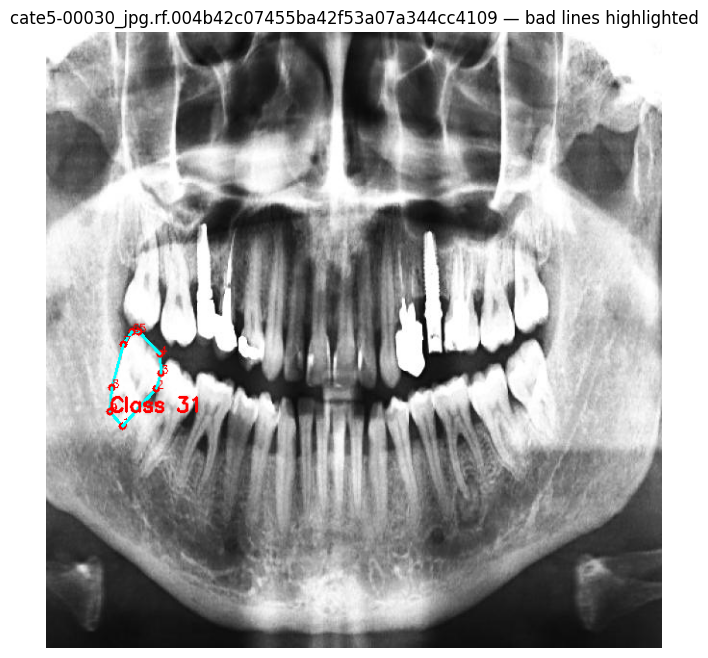

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# --- CONFIG ---
images_dir = "dataset/images"
labels_dir = "dataset/labels"
report_path = os.path.join(labels_dir, "_label_validation_report.csv")

# --- READ REPORT ---
report_df = pd.read_csv(report_path)

# Group errors by image stem
error_groups = report_df.groupby("image_stem")["details"].apply(list).to_dict()

for stem, issues in error_groups.items():
    image_path = os.path.join(images_dir, stem + ".jpg")
    label_path = os.path.join(labels_dir, stem + ".txt")

    if not os.path.exists(image_path) or not os.path.exists(label_path):
        print(f"⚠️ Missing files for {stem}")
        continue

    print(f"\nShowing errors for: {stem}")
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Read label file
    with open(label_path, "r") as f:
        lines = f.readlines()

    for issue in issues:
        try:
            line_num = int(issue.split()[1])  # "line 2 not 5 cols" → 2
        except:
            continue

        if line_num <= 0 or line_num > len(lines):
            continue

        bad_line = lines[line_num - 1].strip()
        parts = bad_line.split()
        if len(parts) <= 5:
            continue  # skip normal YOLO lines

        class_id = int(parts[0])
        coords = list(map(float, parts[1:]))
        points = [(int(coords[i] * w), int(coords[i+1] * h)) for i in range(0, len(coords), 2)]

        # Draw polygon
        for i, pt in enumerate(points):
            cv2.circle(img, pt, 4, (255, 0, 0), -1)  # blue dots
            cv2.putText(img, str(i), pt, cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
            cv2.line(img, pt, points[(i+1) % len(points)], (0, 255, 255), 2)

        # Label class id
        cv2.putText(img, f"Class {class_id}", points[0],
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Show
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"{stem} — bad lines highlighted")
    plt.axis("off")
    plt.show()


In [10]:
import shutil
import os

# Define the source and destination paths
source_dir = 'dataset'
destination_dir = 'dataset_copy' # You can change this name

# Check if the source directory exists
if os.path.exists(source_dir):
    # Remove the destination directory if it already exists
    if os.path.exists(destination_dir):
        shutil.rmtree(destination_dir)
        print(f"Removed existing directory: {destination_dir}")

    # Copy the directory
    shutil.copytree(source_dir, destination_dir)
    print(f"Dataset copied from '{source_dir}' to '{destination_dir}'")
else:
    print(f"Source directory '{source_dir}' not found.")

# Verify the copied directory contents (optional)
if os.path.exists(destination_dir):
    print(f"Contents of the copied directory '{destination_dir}':")
    print(os.listdir(destination_dir))

Dataset copied from 'dataset' to 'dataset_copy'
Contents of the copied directory 'dataset_copy':
['images', 'labels']


In [11]:
# Unzip the dataset if it's in a zip file
import zipfile
import os

zip_file_path = 'ToothNumber_TaskDataset.zip'
extract_dir = 'dataset'

if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Dataset unzipped to '{extract_dir}'")
else:
    print(f"Zip file not found: {zip_file_path}")

# Check the extracted files
if os.path.exists(extract_dir):
    print(f"Contents of the extracted directory '{extract_dir}':")
    print(os.listdir(extract_dir))

Dataset unzipped to 'dataset'
Contents of the extracted directory 'dataset':
['images', 'labels']


In [12]:
import shutil
import os

# Define the source and destination paths
source_dir = 'dataset'
destination_dir = 'dataset_copy' # You can change this name

# Check if the source directory exists
if os.path.exists(source_dir):
    # Remove the destination directory if it already exists
    if os.path.exists(destination_dir):
        shutil.rmtree(destination_dir)
        print(f"Removed existing directory: {destination_dir}")

    # Copy the directory
    shutil.copytree(source_dir, destination_dir)
    print(f"Dataset copied from '{source_dir}' to '{destination_dir}'")
else:
    print(f"Source directory '{source_dir}' not found.")

# Verify the copied directory contents (optional)
if os.path.exists(destination_dir):
    print(f"Contents of the copied directory '{destination_dir}':")
    print(os.listdir(destination_dir))

Removed existing directory: dataset_copy
Dataset copied from 'dataset' to 'dataset_copy'
Contents of the copied directory 'dataset_copy':
['images', 'labels']


From the dataset the issues from the report have been removed in the dataset_copy

In [13]:
import os

labels_dir = "dataset_copy/labels"

if os.path.exists(labels_dir):
    label_files = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]
    print(f"Found {len(label_files)} label files:")
    # Print a few file names as a sample
    print(label_files[:10])
else:
    print(f"Error: Label directory not found at {labels_dir}")
    label_files = []

Found 497 label files:
['cate8-00137_jpg.rf.34823f8760ec5c1519d7ca8cdc4c4de2.txt', 'cate6-00069_jpg.rf.f6d5c4f63c0be142252591ef2105a1cb.txt', 'cate8-00047_jpg.rf.69a380386f73f406924619374d41cfe3.txt', 'cate9-00004_jpg.rf.a84c049fd7c8c3ba18a4155a6c9e0bde.txt', 'e35fc3d5-20240910-133514980.txt', 'cate6-00101_jpg.rf.27ed4471932f755f9bb621416bced5f5.txt', '3357f3d4-20240824-123243101.txt', 'cate8-00083_jpg.rf.442b5fcf594d078a0ce73490bc224798.txt', 'cate7-00004_jpg.rf.777959ae5f8a40fd8515f7754f975f4e.txt', 'cate8-00053_jpg.rf.c59157b3aad8afbcb5b589f7094cabdc.txt']


In [14]:
import os

labels_dir = "dataset_copy/labels"

if not os.path.exists(labels_dir):
    print(f"Error: Label directory not found at {labels_dir}")
else:
    print(f"Processing {len(label_files)} label files...")
    for label_file in label_files:
        label_path = os.path.join(labels_dir, label_file)
        valid_lines = []
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) == 5:
                # Check if all parts can be converted to float (class_id is int, others are float)
                try:
                    list(map(float, parts))
                    valid_lines.append(line)
                except ValueError:
                    # Skip lines with non-numeric values
                    print(f"Skipping invalid line in {label_file}: {line.strip()}")


        # Overwrite the file with valid lines
        with open(label_path, "w") as f:
            f.writelines(valid_lines)

    print("Finished processing label files.")

Processing 497 label files...
Finished processing label files.


In [15]:
import os

images_dir = "dataset_copy/images"
labels_dir = "dataset_copy/labels"

# Get list of image files (assuming they are .jpg and .png)
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]

# Create a list of (image_path, label_path) pairs
data_pairs = []
for img_file in image_files:
    stem, ext = os.path.splitext(img_file)
    label_file = stem + ".txt"
    label_path = os.path.join(labels_dir, label_file)
    image_path = os.path.join(images_dir, img_file)

    if os.path.exists(label_path):
        data_pairs.append((image_path, label_path))
    else:
        print(f"Warning: Missing label file for image: {img_file}")

print(f"Found {len(data_pairs)} image-label pairs.")

Found 497 image-label pairs.


In [16]:
import random
import os

# Assuming 'data_pairs' variable exists from the previous cell execution
if 'data_pairs' not in locals() or not data_pairs:
    print("Error: 'data_pairs' not found or is empty. Please run the previous cell to create it.")
else:
    # Set random seed for reproducibility
    random.seed(42)
    random.shuffle(data_pairs)

    # Define split ratios
    train_ratio = 0.8
    val_ratio = 0.1
    test_ratio = 0.1

    # Calculate split sizes
    total_size = len(data_pairs)
    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)
    test_size = total_size - train_size - val_size # Ensure all pairs are included

    # Split the data pairs
    train_pairs = data_pairs[:train_size]
    val_pairs = data_pairs[train_size:train_size + val_size]
    test_pairs = data_pairs[train_size + val_size:]

    print(f"Total pairs: {total_size}")
    print(f"Training pairs: {len(train_pairs)}")
    print(f"Validation pairs: {len(val_pairs)}")
    print(f"Testing pairs: {len(test_pairs)}")

    # Create directories for the split dataset
    base_dir = "dataset_split"
    os.makedirs(os.path.join(base_dir, "train", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "train", "labels"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "val", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "val", "labels"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "test", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "test", "labels"), exist_ok=True)

    print(f"\nCreated directories for split dataset in '{base_dir}'")

Total pairs: 497
Training pairs: 397
Validation pairs: 49
Testing pairs: 51

Created directories for split dataset in 'dataset_split'


In [17]:
import shutil
import os

# Assuming train_pairs, val_pairs, and test_pairs variables exist from the previous cell execution
if 'train_pairs' not in locals() or 'val_pairs' not in locals() or 'test_pairs' not in locals():
    print("Error: Data pairs not found. Please run the previous cell to split the data.")
else:
    base_dir = "dataset_split"

    # Function to copy files
    def copy_pairs(pairs, split_name):
        print(f"\nCopying {split_name} files...")
        for image_path, label_path in pairs:
            # Get the base filename
            img_filename = os.path.basename(image_path)
            label_filename = os.path.basename(label_path)

            # Define destination paths
            dest_image_path = os.path.join(base_dir, split_name, "images", img_filename)
            dest_label_path = os.path.join(base_dir, split_name, "labels", label_filename)

            # Copy files
            try:
                shutil.copy2(image_path, dest_image_path)
                shutil.copy2(label_path, dest_label_path)
            except FileNotFoundError:
                print(f"⚠️ Skipping missing file during copy: {image_path} or {label_path}")
            except Exception as e:
                print(f"❌ Error copying files: {e}")


    # Copy files for each split
    copy_pairs(train_pairs, "train")
    copy_pairs(val_pairs, "val")
    copy_pairs(test_pairs, "test")

    print("\nFinished copying files to split directories.")


Copying train files...

Copying val files...

Copying test files...

Finished copying files to split directories.


In [18]:
import yaml
import os

# Define the path to the split dataset directory
base_dir = "dataset_split"

# Define the content of the data.yaml file
data_yaml_content = {
    'train': os.path.join(base_dir, 'train', 'images'),
    'val': os.path.join(base_dir, 'val', 'images'),
    'test': os.path.join(base_dir, 'test', 'images'),
    'nc': 32,  # Number of classes
    'names': {
        0: 'Canine (13)', 1: 'Canine (23)', 2: 'Canine (33)', 3: 'Canine (43)',
        4: 'Central Incisor (21)', 5: 'Central Incisor (41)', 6: 'Central Incisor (31)', 7: 'Central Incisor (11)',
        8: 'First Molar (16)', 9: 'First Molar (26)', 10: 'First Molar (36)', 11: 'First Molar (46)',
        12: 'First Premolar (14)', 13: 'First Premolar (34)', 14: 'First Premolar (44)', 15: 'First Premolar (24)',
        16: 'Lateral Incisor (22)', 17: 'Lateral Incisor (32)', 18: 'Lateral Incisor (42)', 19: 'Lateral Incisor (12)',
        20: 'Second Molar (17)', 21: 'Second Molar (27)', 22: 'Second Molar (37)', 23: 'Second Molar (47)',
        24: 'Second Premolar (15)', 25: 'Second Premolar (25)', 26: 'Second Premolar (35)', 27: 'Second Premolar (45)',
        28: 'Third Molar (18)', 29: 'Third Molar (28)', 30: 'Third Molar (38)', 31: 'Third Molar (48)'
    }
}

# Define the path where the data.yaml file will be saved
data_yaml_path = 'data.yaml'

# Write the content to the data.yaml file
with open(data_yaml_path, 'w') as f:
    yaml.dump(data_yaml_content, f, default_flow_style=False)

print(f"'{data_yaml_path}' file created successfully.")

# Optional: Print the content of the created file
print("\nContent of data.yaml:")
with open(data_yaml_path, 'r') as f:
    print(f.read())

'data.yaml' file created successfully.

Content of data.yaml:
names:
  0: Canine (13)
  1: Canine (23)
  2: Canine (33)
  3: Canine (43)
  4: Central Incisor (21)
  5: Central Incisor (41)
  6: Central Incisor (31)
  7: Central Incisor (11)
  8: First Molar (16)
  9: First Molar (26)
  10: First Molar (36)
  11: First Molar (46)
  12: First Premolar (14)
  13: First Premolar (34)
  14: First Premolar (44)
  15: First Premolar (24)
  16: Lateral Incisor (22)
  17: Lateral Incisor (32)
  18: Lateral Incisor (42)
  19: Lateral Incisor (12)
  20: Second Molar (17)
  21: Second Molar (27)
  22: Second Molar (37)
  23: Second Molar (47)
  24: Second Premolar (15)
  25: Second Premolar (25)
  26: Second Premolar (35)
  27: Second Premolar (45)
  28: Third Molar (18)
  29: Third Molar (28)
  30: Third Molar (38)
  31: Third Molar (48)
nc: 32
test: dataset_split/test/images
train: dataset_split/train/images
val: dataset_split/val/images



In [19]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


In [20]:
from ultralytics import YOLO

# Load a pretrained YOLOv8s model
model = YOLO('yolov8s.pt')

# Train the model using the data.yaml file
# The training results (logs, weights, metrics) will be saved in a 'runs' directory by default
results = model.train(data='data.yaml', epochs=100, imgsz=640) # Added epochs and imgsize as suggested

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, 

In [21]:
from ultralytics import YOLO

# Load the trained model
# trained model weights are saved in 'runs/detect/train/weights/best.pt'
model_path = 'runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Evaluate the model on the validation set
print("Evaluating on the validation set:")
val_results = model.val(data='data.yaml', split='val')

# Evaluate the model on the test set
print("\nEvaluating on the test set:")
test_results = model.val(data='data.yaml', split='test')

Evaluating on the validation set:
Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2239.3±871.2 MB/s, size: 74.9 KB)
val: Scanning /content/dataset_split/val/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 112183.9it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1it/s 3.7s
                   all         49       1381       0.91      0.937      0.957      0.686
           Canine (13)         45         45      0.879      0.933      0.956      0.662
           Canine (23)         45         45      0.896      0.958      0.959      0.647
           Canine (33)         48         48      0.954      0.979      0.986      0.691
           Canine (43)         48         48      0.913      0.979      0.962      0.719
  Central I

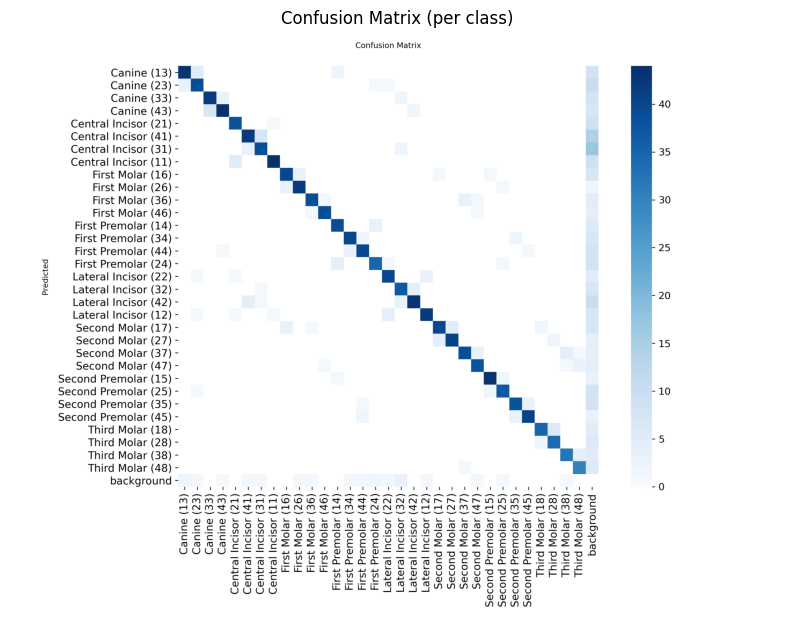

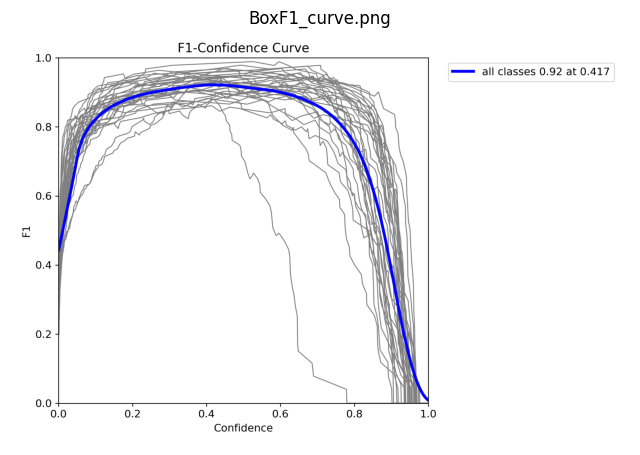

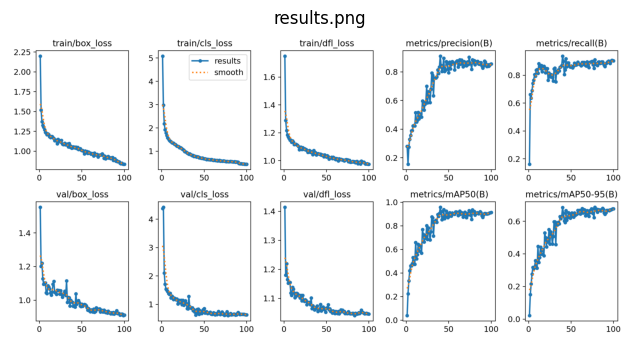

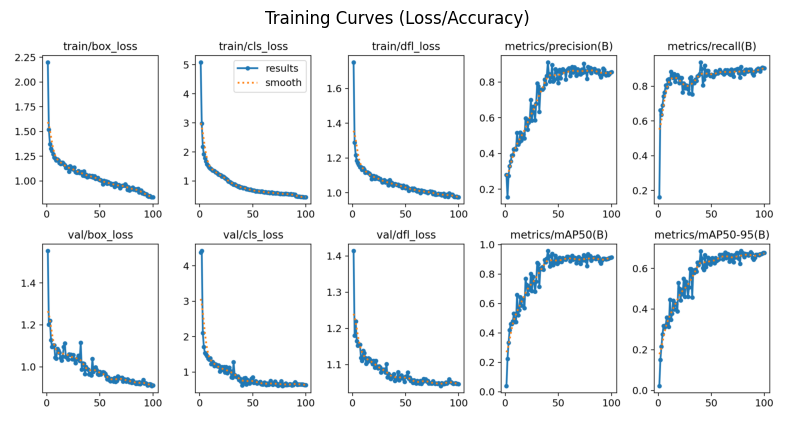


image 1/1 /content/dataset_split/test/images/cate8-00455_jpg.rf.8e80789ad78df1b7a463e8e13c2a4dd3.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 2 Central Incisor (41)s, 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (48), 22.5ms
Speed: 2.1ms preprocess, 22.5ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to sample_preds/preds
Predicted and saved: /content/dataset_split/test/images/cate8-00455_jpg.rf.8e80789ad

In [24]:
import os
import glob
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Path to your training run
train_dir = "/content/runs/detect/train"
val_dir   = "/content/runs/detect/val2"   # your last test evaluation run

# 1. 📊 Confusion Matrix
conf_matrix_path = os.path.join(val_dir, "confusion_matrix.png")
if os.path.exists(conf_matrix_path):
    img = plt.imread(conf_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title("Confusion Matrix (per class)")
    plt.axis("off")
    plt.show()
else:
    print("Confusion matrix not found at:", conf_matrix_path)

# 2. 📈 Performance Curves (Precision, Recall, mAP)
metrics_plots = [
    "PR_curve.png",       # Precision-Recall
    "F1_curve.png",       # F1
    "P_curve.png",        # Precision vs IoU
    "R_curve.png",        # Recall vs IoU
    "BoxF1_curve.png",    # Box F1
    "results.png"         # Training summary
]

for fname in metrics_plots:
    fpath = os.path.join(train_dir, fname)
    if os.path.exists(fpath):
        img = plt.imread(fpath)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(fname)
        plt.axis("off")
        plt.show()

# 3. 📉 Training curves (loss/accuracy etc.)
results_img = os.path.join(train_dir, "results.png")
if os.path.exists(results_img):
    img = plt.imread(results_img)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title("Training Curves (Loss/Accuracy)")
    plt.axis("off")
    plt.show()

# 4. 🖼️ Sample Predictions
# Load best model
best_model_path = os.path.join(train_dir, "weights", "best.pt")
model = YOLO(best_model_path)

# Run inference on a few test images
sample_images = glob.glob("/content/dataset_split/test/images/*.jpg")[:5]  # take first 5 test images
os.makedirs("sample_preds", exist_ok=True)

for img_path in sample_images:
    results = model.predict(img_path, save=True, project="sample_preds", name="preds", conf=0.25)
    print(f"Predicted and saved: {img_path}")

print("✅ All evaluation outputs ready: confusion matrix, metrics, training curves, sample predictions.")


In [25]:
import numpy as np
from ultralytics import YOLO

def postprocess_teeth(preds, img_shape):
    """
    preds: list of detections from YOLO (each as [x1, y1, x2, y2, conf, class])
    img_shape: (h, w) of image
    """
    h, w = img_shape

    # Get image midlines
    y_mid = h // 2   # separate upper vs lower arch
    x_mid = w // 2   # separate left vs right

    # Store quadrants
    quadrants = {1: [], 2: [], 3: [], 4: []}

    for det in preds:
        x1, y1, x2, y2, conf, cls = det
        cx = (x1 + x2) / 2
        cy = (y1 + y2) / 2

        # Assign to quadrant
        if cy < y_mid:  # upper arch
            if cx < x_mid:
                quadrants[2].append((cx, cy, det))  # upper left (FDI quadrant 2)
            else:
                quadrants[1].append((cx, cy, det))  # upper right (FDI quadrant 1)
        else:  # lower arch
            if cx < x_mid:
                quadrants[3].append((cx, cy, det))  # lower left (FDI quadrant 3)
            else:
                quadrants[4].append((cx, cy, det))  # lower right (FDI quadrant 4)

    # Sort horizontally in each quadrant
    for q in quadrants:
        if q in [1, 4]:  # right side → left to right
            quadrants[q] = sorted(quadrants[q], key=lambda x: x[0])
        else:  # left side → right to left
            quadrants[q] = sorted(quadrants[q], key=lambda x: -x[0])

    # Assign FDI tooth numbers (1=central incisor … 8=third molar)
    fdi_map = {}
    for q, detections in quadrants.items():
        for i, (cx, cy, det) in enumerate(detections, start=1):
            if i > 8:
                continue  # skip extra detections
            fdi_num = int(f"{q}{i}")  # e.g., 11, 12, …, 48
            fdi_map[fdi_num] = det

    return fdi_map


# ----------------- Example Usage -----------------
# Load trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Predict on one image
results = model("dataset/images/cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.jpg")[0]

# Post-process
preds = results.boxes.data.cpu().numpy()  # [x1, y1, x2, y2, conf, cls]
h, w = results.orig_shape
fdi_assignments = postprocess_teeth(preds, (h, w))

# Print assigned FDI numbers
for fdi, det in fdi_assignments.items():
    print(f"Tooth {fdi}: {det}")



image 1/1 /content/dataset/images/cate5-00030_jpg.rf.004b42c07455ba42f53a07a344cc4109.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 2 Canine (43)s, 1 Central Incisor (21), 2 Central Incisor (41)s, 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 2 Second Molar (27)s, 2 Second Molar (37)s, 1 Second Molar (47), 2 Second Premolar (15)s, 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (28), 1 Third Molar (38), 1 Third Molar (48), 58.1ms
Speed: 2.1ms preprocess, 58.1ms inference, 13.4ms postprocess per image at shape (1, 3, 640, 640)
Tooth 11: [     323.91      223.67      346.23      371.27     0.89957          16]
Tooth 12: [     346.11      210.15        

In [26]:
!pip freeze > requirements.txt
print("Generated requirements.txt")

Generated requirements.txt


# Dental Panoramic X-ray Tooth Numbering

This repository contains the code and resources for training a YOLOv8 model to perform tooth numbering on dental panoramic X-ray images using the FDI system.

## Project Steps:

1.  **Dataset Loading and Unzipping**: The dataset, provided as a zip file (`ToothNumber_TaskDataset.zip`), was uploaded and unzipped to a local directory (`dataset`).
2.  **Dataset Copy**: A copy of the original dataset (`dataset_copy`) was created to perform cleaning and splitting without altering the original data.
3.  **Label File Cleaning**: Invalid annotation rows (those not following the 5-value YOLO format) were removed from the label files in `dataset_copy`.
4.  **Dataset Splitting**: The cleaned dataset (`dataset_copy`) was split into training (80%), validation (10%), and testing (10%) sets. The image and corresponding label files were copied into separate directories (`dataset_split/train`, `dataset_split/val`, `dataset_split/test`).
5.  **Data Configuration**: A `data.yaml` file was created to configure the dataset paths and class names for YOLO training, following the FDI tooth numbering system.
6.  **Environment Setup**: Necessary libraries, including `ultralytics`, were installed using `pip`. A `requirements.txt` file was generated to list the project dependencies.
7.  **Model Training**: A YOLOv8s model was trained on the prepared dataset using pretrained weights.
8.  **Model Evaluation**: The trained model was evaluated on the validation and test sets to assess its performance. Key metrics (Precision, Recall, mAP@50, mAP@50-95) and visualizations (Confusion Matrix, Training Curves, Sample Predictions) were generated.
9.  **Post-Processing (Optional)**: (Include details here if you implemented and want to mention the post-processing logic for anatomical correctness).

## Repository Contents:

*   `your_notebook_name.ipynb`: The Jupyter notebook containing all the code executed.
*   `data.yaml`: Data configuration file.
*   `requirements.txt`: List of Python dependencies.
*   `runs/detect/train/weights/best.pt`: The trained model weights.
*   `dataset_split/`: Directory containing the split dataset (consider if you want to upload the entire dataset or provide instructions on how to download and split it).
*   `runs/detect/train/results.png`: Training curves plot.
*   `runs/detect/val*/confusion_matrix.png`: Confusion Matrix plot (replace `val*` with your validation run directory name).
*   `runs/detect/val*/PR_curve.png`, `runs/detect/val*/R_curve.png`, `runs/detect/val*/F1_curve.png`: Evaluation curve plots.
*   `sample_preds/preds*/`: Directory containing sample prediction images.

## Setup and Running:

1.  Clone the repository.
2.  Install dependencies using `pip install -r requirements.txt`.
3.  (Provide instructions on how to download and prepare the dataset if not included in the repo).
4.  Run the Jupyter notebook or relevant Python scripts to reproduce the training and evaluation.

## Training Command Example:

In [28]:
!yolo val model=runs/detect/train/weights/best.pt data=data.yaml split=val
!yolo val model=runs/detect/train/weights/best.pt data=data.yaml split=test

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2283.0±444.8 MB/s, size: 56.5 KB)
val: Scanning /content/dataset_split/val/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 974032.7it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.90it/s 4.4s
                   all         49       1381       0.91      0.937      0.957      0.686
           Canine (13)         45         45      0.879      0.933      0.956      0.662
           Canine (23)         45         45      0.896      0.958      0.959      0.647
           Canine (33)         48         48      0.954      0.979      0.986      0.691
           Canine (43)         48         48      0.913      0.979      0.962      0.719
  Central Incisor (21)         46         46